In [1]:
#from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input, decode_predictions
import numpy as np
from keras.preprocessing import image
import operator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = MobileNet(weights='imagenet')

In [3]:
def predict(img_path):    
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    return decode_predictions(preds, top=3)[0][0][1]
    

In [4]:
folders = ["birds/mandarin/man", "birds/wood_duck/wod", "birds/toucan/tou", "birds/puffin/puf", 
           "birds/owl/owl", "birds/egret/egr"]
birds = ["mandarin", "wood_duck", "toucan", "puffin", "owl", "egret"]

In [5]:
d = {}
for i in range(6):
    for j in range(1,101):
        s = predict(folders[i]+str(j).zfill(3)+".jpg")
        if s in d:
            d[s] += 1
        else:
            d[s] = 1

/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2652897280 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2656043008 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 334102528 bytes but o

In [6]:
sd = sorted(d.items(), key=operator.itemgetter(1), reverse=True)
ten = []
for i in range(min(len(sd), 10)):
    ten.append(sd[i][0])

In [7]:
true = []
pred = []
for i in range(6):
    for j in range(1,101):
        s = predict(folders[i]+str(j).zfill(3)+".jpg")
        if s in ten:
            pred.append(s)
        else:
            pred.append("other")
        true.append(birds[i])

/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2652897280 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2656043008 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 334102528 bytes but o

In [8]:
for j in range(6):
    for i in range(j*100,(j+1)*100):
        print(true[i], "\t", pred[i])

mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 other
mandarin 	 other
mandarin 	 drake
mandarin 	 drake
mandarin 	 other
mandarin 	 drake
mandarin 	 other
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 water_ouzel
mandarin 	 other
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 other
mandarin 	 drake
mandarin 	 drake
mandarin 	 albatross
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 other
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 drake
mandarin 	 other
mandarin 	 other
mandarin 	 drake
mandarin 	 drake
mandarin 	 other
mandarin 	 drake
mand

In [9]:
def plot_confusion_matrix(cm, xclasses, yclasses,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    xtick_marks = np.arange(len(xclasses))
    ytick_marks = np.arange(len(yclasses))
    plt.xticks(xtick_marks, xclasses, rotation=90)
    plt.yticks(ytick_marks, yclasses)

    fmt = 'd'
    thresh = cm.max() / 2.

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 91  0  0  0  0  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 80  0  0  0  0  0 18  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  4  0  0 14  0  0  0 37  0 27  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16 12  0  0  8 18  0 19  0  1  0 20  6  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0 97  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 97  0  0  0  1  0  2  0  0  0  0  0  0]]


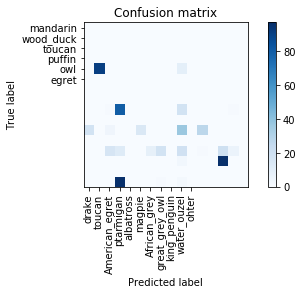

In [10]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(true, pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix[:,:], xclasses=ten+["ohter"], yclasses=birds)